In [50]:
%matplotlib inline
import matplotlib.pyplot as plt
from collections import Counter
import math, random
from IPython.display import Image

def distance(v, w):
    return magnitude(vector_substract(v, w))

def vector_substract(v, w):
    return [v_i - w_i for v_i, w_i in zip(v, w)]

def dot(v, w):
    return sum(v_i * w_i for v_i, w_i in zip(v, w))

def sum_of_squares(v):
    return dot(v,v)

def magnitude(v):
    return math.sqrt(sum_of_squares(v))

def mean(x):
    return sum(x) / len(x)

# K근접이웃

### 1. 뭐 하는 것인가
- 분류
- 비지도학습
- 분류기준="거리"

### 2. 특징
- 머신러닝 알고리즘 중 구현이 가장 쉽다
- 전체데이터를 볼 필요가 없다
- 학습이 필요 없다

### 3. 원리

# "너는 옆에 있는 애들이랑 비슷해"

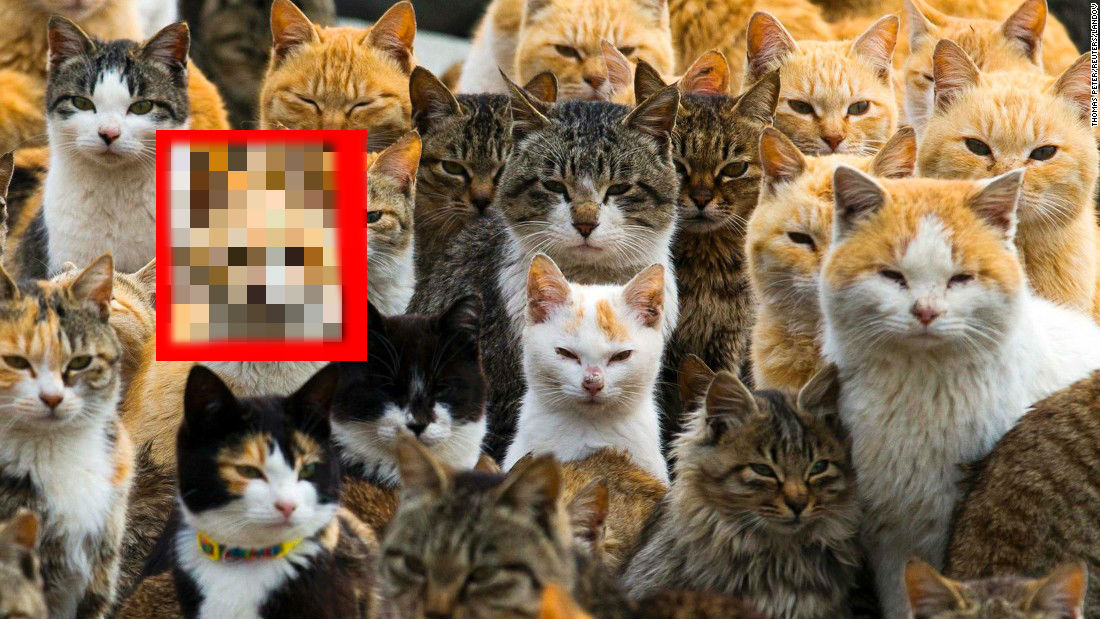

In [58]:
Image("./data/qcats.jpg")
#Image("./data/cats.jpg")

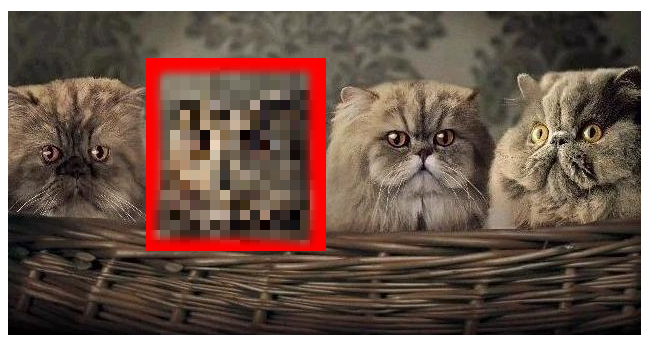

In [59]:
Image("./data/qspy_among_us.png")
#Image("./data/spy_among_us.png")

## K-근접이웃의 기본 가정
- 가까이 있는거랑 비슷하다
- 거리를 측정할 수 있다.


## K-근접이웃의 분류기준
1. 분류하려는 개체에 가장 근접한 K개의 이웃을 구한다.
2. K개의 이웃들이 어떤 라벨을 달고 있는지 확인하고, 그 중 많은 숫자의 라벨을 붙인다.

## K-근접이웃의 예시

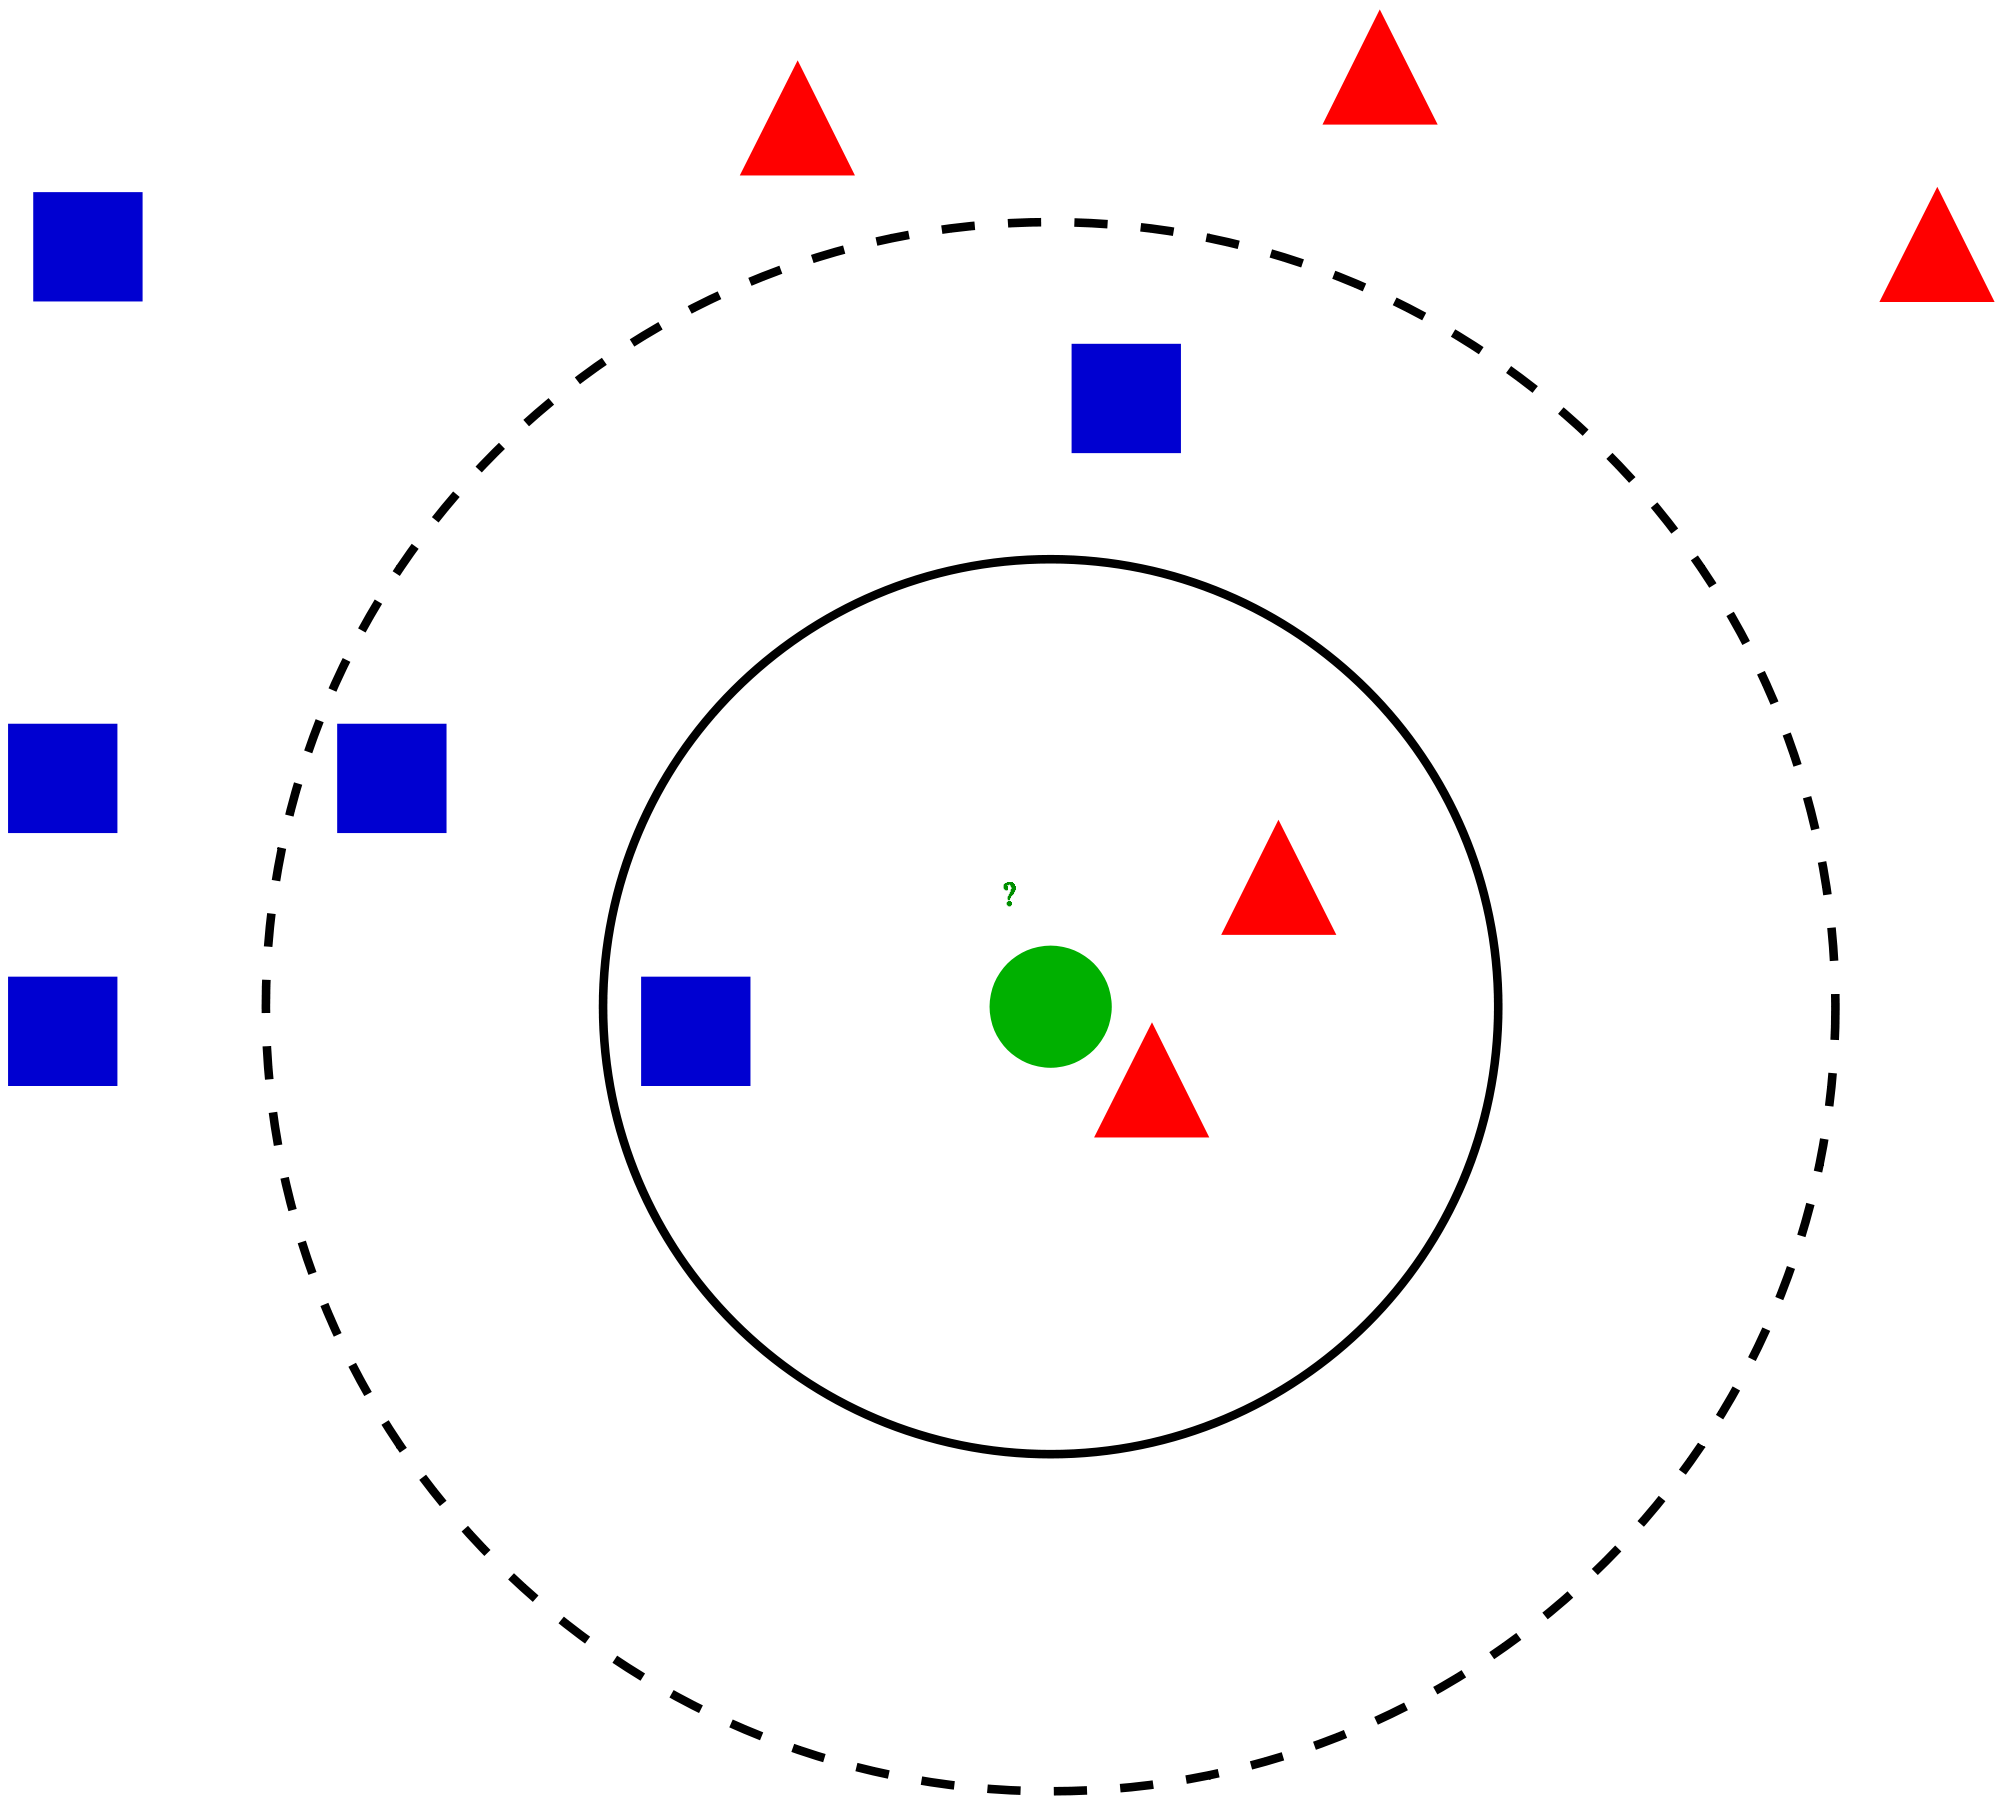

In [61]:
Image("./data/2000px-KnnClassification.svg.png")

### K가 5일때 초록색 동그라미는 무엇으로 분류되나?

____
____
____
____

____
____
____
____

____
____
____
____

2. 예시
====
밑작업

In [41]:
import re

def plot_state_borders(color='0.8'):
    segments = []
    points = []

    lat_long_regex = r"<point lat=\"(.*)\" lng=\"(.*)\""

    with open("states.txt", "r") as f:
        lines = [line for line in f]

    for line in lines:
        if line.startswith("</state>"):
            for p1, p2 in zip(points, points[1:]):
                segments.append((p1, p2))
            points = []
        s = re.search(lat_long_regex, line)
        if s:
            lat, lon = s.groups()
            points.append((float(lon), float(lat)))
    for (lon1, lat1), (lon2, lat2) in segments:
        plt.plot([lon1, lon2], [lat1, lat2], color=color)

#### 주변에 있는 라벨들 중 가장 많은 라벨을 구하는 간단한 함수

In [62]:
def raw_majority_vote(labels):
    votes = Counter(labels)
    winner, _ = votes.most_common(1)[0]
    return winner

#### 주변에 있는 라벨들 중 가장 많은 라벨을 구하는 덜 간단한 함수

In [ ]:
def majority_vote(labels):
    """assumes that labels are ordered from nearest to farthest"""
    vote_counts = Counter(labels)
    winner, winner_count = vote_counts.most_common(1)[0]
    num_winners = len([count
                       for count in vote_counts.values()
                       if count == winner_count])

    if num_winners == 1:
        return winner                     # unique winner, so return it
    else:
        return majority_vote(labels[:-1]) # try again without the farthest

#### 위의 함수를 이용한 KNN 분류기

In [63]:
def knn_classify(k, labeled_points, new_point):
    """each labeled point should be a pair (point, label)"""

    # order the labeled points from nearest to farthest
    by_distance = sorted(labeled_points,
                         key=lambda point_label: distance(point_label[0], new_point))

    # find the labels for the k closest
    k_nearest_labels = [label for _, label in by_distance[:k]]

    # and let them vote
    return majority_vote(k_nearest_labels)


#### 위의 knn분류기를 2차원에서 간단히 테스트해보자 (책에 없음)

In [90]:
print("min: %.3f" % min([random.random() for _ in range(100)]))
print("max: %.3f" % max([random.random() for _ in range(100)]))

min: 0.033
max: 0.993


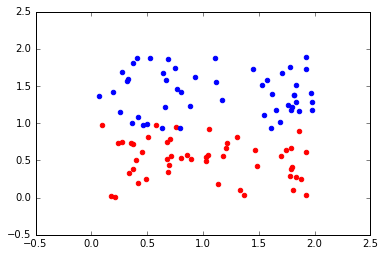

In [127]:
groupa = [((random.random()*2, random.random()*1), 'r') for _ in range(50)]
groupb = [((random.random()*2, random.random()*1+0.9), 'b') for _ in range(50)]
elements = groupa+groupb
for ((x, y), label) in elements:
    plt.scatter(x, y, color=label)

In [126]:
knn_classify(4, elements, [0.5, 1])

'r'

### 책에 있는 예제를 해보자 (책에 있음)

#### 갖고있는 데이터를 보자

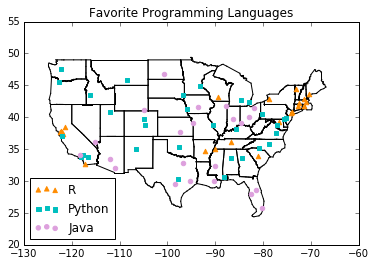

In [133]:
# we want each language to have a different marker and color
markers = { "Java" : "o", "Python" : "s", "R" : "^" }
colors  = { "Java" : "plum", "Python" : "c", "R" : "darkorange" }

cities = [(-86.75,33.5666666666667,'Python'),(-88.25,30.6833333333333,'Python'),(-112.016666666667,33.4333333333333,'Java'),(-110.933333333333,32.1166666666667,'Java'),(-92.2333333333333,34.7333333333333,'R'),(-121.95,37.7,'R'),(-118.15,33.8166666666667,'Python'),(-118.233333333333,34.05,'Java'),(-122.316666666667,37.8166666666667,'R'),(-117.6,34.05,'Python'),(-116.533333333333,33.8166666666667,'Python'),(-121.5,38.5166666666667,'R'),(-117.166666666667,32.7333333333333,'R'),(-122.383333333333,37.6166666666667,'R'),(-121.933333333333,37.3666666666667,'R'),(-122.016666666667,36.9833333333333,'Python'),(-104.716666666667,38.8166666666667,'Python'),(-104.866666666667,39.75,'Python'),(-72.65,41.7333333333333,'R'),(-75.6,39.6666666666667,'Python'),(-77.0333333333333,38.85,'Python'),(-80.2666666666667,25.8,'Java'),(-81.3833333333333,28.55,'Java'),(-82.5333333333333,27.9666666666667,'Java'),(-84.4333333333333,33.65,'Python'),(-116.216666666667,43.5666666666667,'Python'),(-87.75,41.7833333333333,'Java'),(-86.2833333333333,39.7333333333333,'Java'),(-93.65,41.5333333333333,'Java'),(-97.4166666666667,37.65,'Java'),(-85.7333333333333,38.1833333333333,'Python'),(-90.25,29.9833333333333,'Java'),(-70.3166666666667,43.65,'R'),(-76.6666666666667,39.1833333333333,'R'),(-71.0333333333333,42.3666666666667,'R'),(-72.5333333333333,42.2,'R'),(-83.0166666666667,42.4166666666667,'Python'),(-84.6,42.7833333333333,'Python'),(-93.2166666666667,44.8833333333333,'Python'),(-90.0833333333333,32.3166666666667,'Java'),(-94.5833333333333,39.1166666666667,'Java'),(-90.3833333333333,38.75,'Python'),(-108.533333333333,45.8,'Python'),(-95.9,41.3,'Python'),(-115.166666666667,36.0833333333333,'Java'),(-71.4333333333333,42.9333333333333,'R'),(-74.1666666666667,40.7,'R'),(-106.616666666667,35.05,'Python'),(-78.7333333333333,42.9333333333333,'R'),(-73.9666666666667,40.7833333333333,'R'),(-80.9333333333333,35.2166666666667,'Python'),(-78.7833333333333,35.8666666666667,'Python'),(-100.75,46.7666666666667,'Java'),(-84.5166666666667,39.15,'Java'),(-81.85,41.4,'Java'),(-82.8833333333333,40,'Java'),(-97.6,35.4,'Python'),(-122.666666666667,45.5333333333333,'Python'),(-75.25,39.8833333333333,'Python'),(-80.2166666666667,40.5,'Python'),(-71.4333333333333,41.7333333333333,'R'),(-81.1166666666667,33.95,'R'),(-96.7333333333333,43.5666666666667,'Python'),(-90,35.05,'R'),(-86.6833333333333,36.1166666666667,'R'),(-97.7,30.3,'Python'),(-96.85,32.85,'Java'),(-95.35,29.9666666666667,'Java'),(-98.4666666666667,29.5333333333333,'Java'),(-111.966666666667,40.7666666666667,'Python'),(-73.15,44.4666666666667,'R'),(-77.3333333333333,37.5,'Python'),(-122.3,47.5333333333333,'Python'),(-89.3333333333333,43.1333333333333,'R'),(-104.816666666667,41.15,'Java')]
cities = [([longitude, latitude], language) for longitude, latitude, language in cities]


def plot_cities():
    # key is language, value is pair (longitudes, latitudes)
    plots = { "Java" : ([], []), "Python" : ([], []), "R" : ([], []) }


    for (longitude, latitude), language in cities:
        plots[language][0].append(longitude)
        plots[language][1].append(latitude)

    # create a scatter series for each language
    for language, (x, y) in plots.items():
        plt.scatter(x, y, color=colors[language], marker=markers[language],
                          label=language, zorder=10)

    plot_state_borders(color='black')    # assume we have a function that does this

    plt.legend(loc=0)          # let matplotlib choose the location
    plt.axis([-130,-60,20,55]) # set the axes
    plt.title("Favorite Programming Languages")
    plt.show()
    
plot_cities()

#### K를 뭘로 하면 좋을까

In [134]:
# try several different values for k
for k in [1, 3, 5, 7]:
    num_correct = 0

    for location, actual_language in cities:

        other_cities = [other_city
                        for other_city in cities
                        if other_city != (location, actual_language)]

        predicted_language = knn_classify(k, other_cities, location)

        if predicted_language == actual_language:
            num_correct += 1

    print(k, "neighbor[s]:", num_correct, "correct out of", len(cities))


1 neighbor[s]: 40 correct out of 75
3 neighbor[s]: 44 correct out of 75
5 neighbor[s]: 41 correct out of 75
7 neighbor[s]: 35 correct out of 75


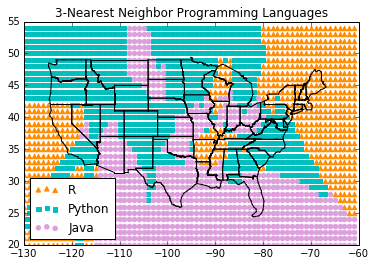

CPU times: user 17.2 s, sys: 77.6 ms, total: 17.3 s
Wall time: 17.4 s


In [144]:
def classify_and_plot_grid(k=1):
    plots = { "Java" : ([], []), "Python" : ([], []), "R" : ([], []) }

    for longitude in range(-130, -60):
        for latitude in range(20, 55):
            predicted_language = knn_classify(k, cities, [longitude, latitude])
            plots[predicted_language][0].append(longitude)
            plots[predicted_language][1].append(latitude)

    # create a scatter series for each language
    for language, (x, y) in plots.items():
        plt.scatter(x, y, color=colors[language], marker=markers[language],
                          label=language, zorder=0)

    plot_state_borders(color='black')    # assume we have a function that does this

    plt.legend(loc=0)          # let matplotlib choose the location
    plt.axis([-130,-60,20,55]) # set the axes
    plt.title(str(k) + "-Nearest Neighbor Programming Languages")
    plt.show()

%time classify_and_plot_grid(3)

### 2.5 밑바닥부터 시작하지 말아보자
우리의 친구 scikit-learn

In [37]:
from sklearn import neighbors
knn = neighbors.KNeighborsClassifier(n_neighbors=3)
knn.fit([latlan for latlan, lang in cities], [lang for latlan, lang in cities])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [141]:
knn.predict([[-130, 20]])

array(['Java'], 
      dtype='<U6')

### 귿

R
Python
Java


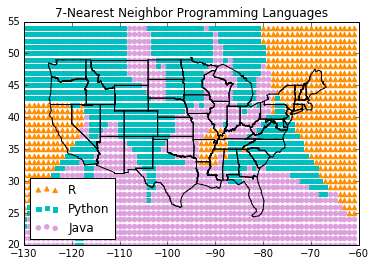

CPU times: user 17.9 s, sys: 25.9 ms, total: 17.9 s
Wall time: 18 s


In [176]:
def classify_scikit_and_plot_grid():
    plots = { "Java" : ([], []), "Python" : ([], []), "R" : ([], []) }
    for longitude in range(-130, -60):
        for latitude in range(20, 55):
            predicted_language = knn.predict([[longitude, latitude]])[0]
            plots[predicted_language][0].append(longitude)
            plots[predicted_language][1].append(latitude)

    # create a scatter series for each language
    for language, (x, y) in plots.items():
        plt.scatter(x, y, color=colors[language], marker=markers[language],
                          label=language, zorder=0)

    plot_state_borders(color='black')    # assume we have a function that does this

    plt.legend(loc=0)          # let matplotlib choose the location
    plt.axis([-130,-60,20,55]) # set the axes
    plt.title(str(k) + "-Nearest Neighbor Programming Languages")
    plt.show()

%time classify_scikit_and_plot_grid()

### 3. 차원의 저주
차원이 많아지면 저주가 발생합니다. 그것은 운명의 데스티니

In [248]:
# dim차원의 랜덤포인트를 만듬
def random_point(dim):
    return [random.random() for _ in range(dim)]

# dim차원 좌표 2개 사이의 거리를 n개 리턴
def random_distances(dim, num_pairs):
    return [distance(random_point(dim), random_point(dim))
            for _ in range(num_pairs)]



dimensions = range(1, 101, 5)

avg_distances = []
min_distances = []
dist_list = []

random.seed(0)
for dim in dimensions:
    distances = random_distances(dim, 10000)  # 10,000 random pairs
    avg_distances.append(mean(distances))     # track the average
    min_distances.append(min(distances))      # track the minimum

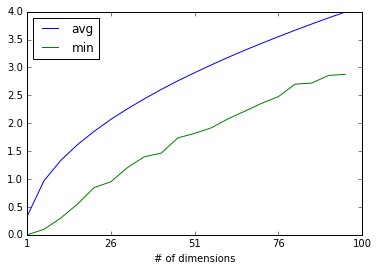

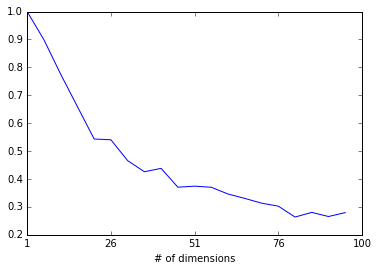

In [249]:
fig, ax1 = plt.subplots()
fig, ax2 = plt.subplots()

for label,data in {'avg':avg_distances, 'min':min_distances}.items():
    ax1.plot(data, label=label)
ax2.plot([1-mind/avgd for avgd, mind in zip(avg_distances, min_distances)], label='1')

for ax in [ax1, ax2]:
    ax.set_xticklabels([1,26,51,76,100])
    ax.set_xlabel("# of dimensions")
    
ax1.legend(loc=0)
ax1.set_title("")
plt.show()

In [256]:
distances = random_distances(10, 10000000)
print( mean(distances), min(distances))

1.2674591246203097 0.18013405508804153


### 20차원쯤 되면, 이웃과의 평균거리와 가장 가까운 이웃과의 거리가 2배밖에 차이 안 남